In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 

In [2]:
import requests

url = "https://yahoo-finance15.p.rapidapi.com/api/yahoo/hi/history/palm.l/1d"

headers = {
    'x-rapidapi-key': "9cd97ba3camsh244cbd2e3e420a4p1e83c0jsne0fdd0787f8e",
    'x-rapidapi-host': "yahoo-finance15.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers)

print(response.text)

{
    "meta": {
        "currency": "GBp",
        "symbol": "PALM.L",
        "exchangeName": "LSE",
        "instrumentType": "EQUITY",
        "firstTradeDate": 1578556800,
        "regularMarketTime": 1628174222,
        "gmtoffset": 3600,
        "timezone": "BST",
        "exchangeTimezoneName": "Europe/London",
        "regularMarketPrice": 12.73,
        "chartPreviousClose": 6.5,
        "priceHint": 2,
        "dataGranularity": "1d",
        "range": ""
    },
    "items": {
        "1578556800": {
            "date": "09-01-2020",
            "open": 13.5,
            "high": 9,
            "low": 6.78,
            "close": 6.5,
            "adjclose": 6.5
        },
        "1578643200": {
            "date": "10-01-2020",
            "open": 6.5,
            "high": 6.7,
            "low": 5.8,
            "close": 6.15,
            "adjclose": 6.15
        },
        "1578902400": {
            "date": "13-01-2020",
            "open": 6.15,
            "high": 6.7,
    

In [3]:
string = response.text

In [4]:
def get_dates(string):
    date = re.compile('"date":((.*),)')
    date = date.findall(string)
    date = [i[0][2:12] for i in date]
    date = [datetime.strptime(i, "%d-%m-%Y").strftime("%Y-%m-%d") for i in date]
    return date

In [5]:
date = get_dates(string)
print( date[:5] )

['2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15']


In [6]:
def get_close(string):
    close = re.compile('"close":((.*),)')
    close = close.findall(string)
    close = [float(i[1].strip()) for i in close]
    return close

In [7]:
close = get_close(string)
close[:5]

[6.5, 6.15, 4.35, 4.35, 4.35]

In [8]:
def form_df(date, close, col_name1, col_name2):
    return pd.DataFrame({col_name1:date, col_name2:close })

In [9]:
palm = form_df(date, close, 'date', 'palm_close')
palm.set_index('date', drop=True, inplace=True)
palm.tail(3)

,palm_close
date,
2021-08-03,12.63
2021-08-04,12.63
2021-08-05,12.73


In [12]:
p1_sprice = 10
p1_wprice = 0
p1_date = '2020-01-01'
p1_swratio = 1/1
p2_sprice = 6.5
p2_wprice = 0
p2_date = '2020-07-01'
p2_swratio = 1/1

In [13]:
palm['p1_sprice'] = [p1_sprice if i  >= p1_date else None for i in palm.index]
# palm['p1_wprice'] = [p1_wprice if i  >= p1_date else None for i in palm.index]

palm['p2_sprice'] = [p2_sprice if i  >= p2_date else None for i in palm.index]
# palm['p2_wprice'] = [p2_wprice if i  >= p2_date else None for i in palm.index]

In [14]:
fund = 10000

In [15]:
palm['p1_sposition'] = [round(fund/p1_sprice,2) if i >= p1_date else 0 for i in palm.index]
# palm['p1_wposition'] = palm['p1_sposition']*p1_swratio


palm['p2_sposition'] = [round(fund/p2_sprice,2) if i >= p2_date else 0 for i in palm.index]
# palm['p2_wposition'] = palm['p2_sposition']*p2_swratio

In [17]:
palm['p1_sprft'] = palm.palm_close - palm['p1_sprice']


palm['p2_sprft'] = palm.palm_close - palm['p2_sprice']

In [18]:
palm = palm.fillna(0)
palm

,palm_close,p1_sprice,p2_sprice,p1_sposition,p2_sposition,p1_sprft,p2_sprft
date,,,,,,,
2020-01-09,6.50,10,0.0,1000.0,0.00,-3.50,0.00
2020-01-10,6.15,10,0.0,1000.0,0.00,-3.85,0.00
2020-01-13,4.35,10,0.0,1000.0,0.00,-5.65,0.00
2020-01-14,4.35,10,0.0,1000.0,0.00,-5.65,0.00
2020-01-15,4.35,10,0.0,1000.0,0.00,-5.65,0.00
2020-01-16,4.35,10,0.0,1000.0,0.00,-5.65,0.00
2020-01-17,4.60,10,0.0,1000.0,0.00,-5.40,0.00
2020-01-20,3.95,10,0.0,1000.0,0.00,-6.05,0.00
2020-01-21,4.10,10,0.0,1000.0,0.00,-5.90,0.00


In [19]:
palm['prft_per_share'] = palm['p1_sprft']+palm['p2_sprft']

In [20]:
palm['p1_10k_rtn'] = palm['p1_sposition']*palm['p1_sprft']
palm['p2_10k_rtn'] = palm['p2_sposition']*palm['p2_sprft']
palm['total_rtn'] = palm['p1_10k_rtn'] + palm['p2_10k_rtn']

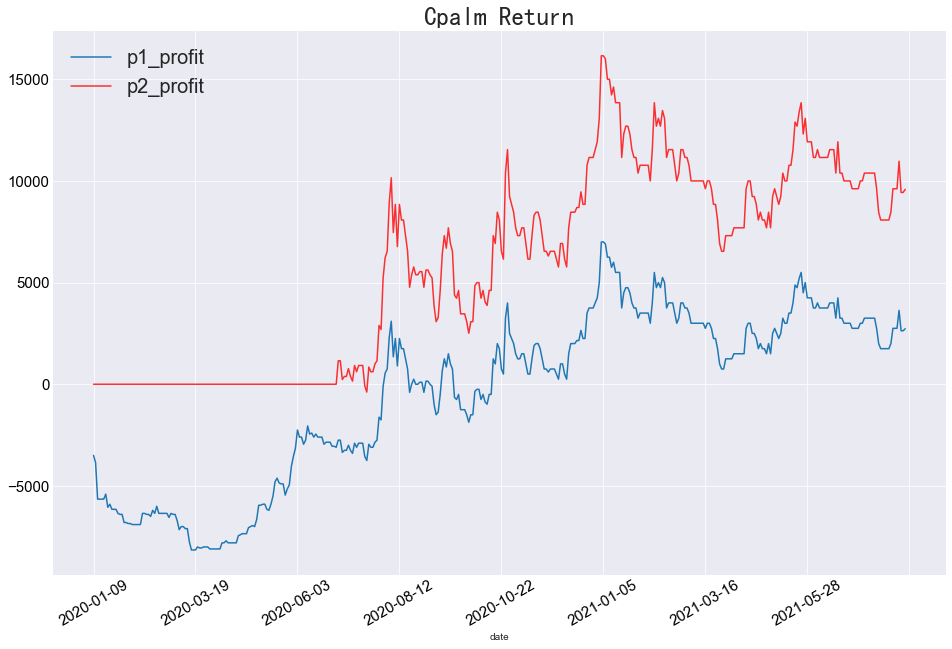

In [21]:
plt.figure(figsize=(16,10))
plt.style.use('seaborn-darkgrid')
palm.p1_10k_rtn.plot()
palm.p2_10k_rtn.plot(color='r', alpha=0.8)
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('palm Return', fontproperties = 'SimHei',fontsize=25)
plt.legend(('p1_profit','p2_profit'),loc="upper left", fontsize=20 );


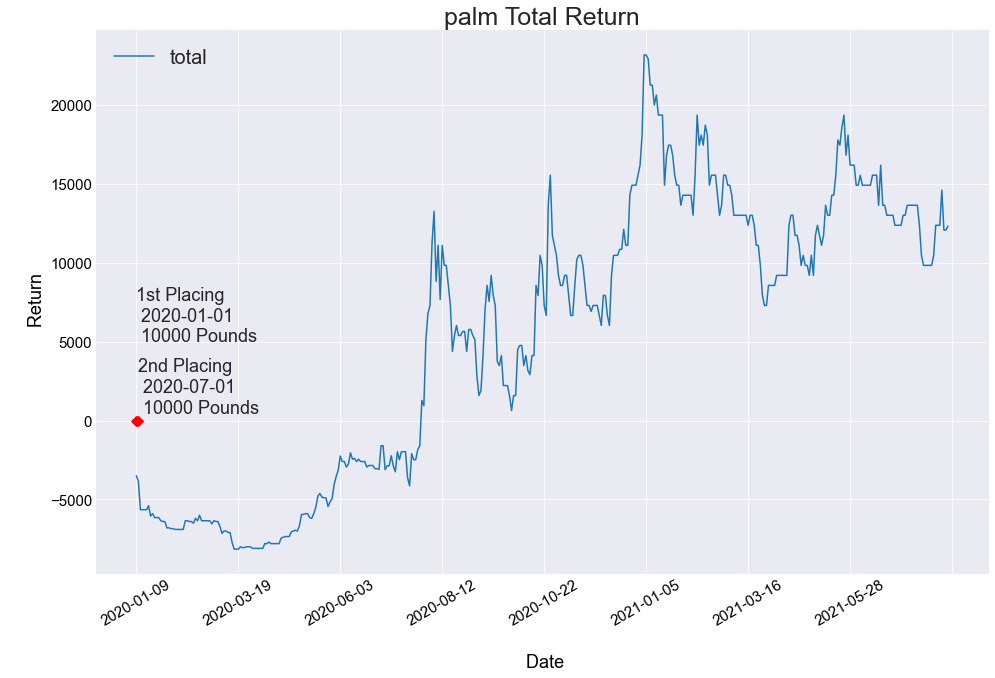

In [22]:
plt.figure(figsize=(16,10))
plt.style.use('seaborn-darkgrid')
# palm.loc[palm.index >= p1_date].p1_10k_rtn.plot()
# palm.loc[palm.index >= p1_date].p2_10k_rtn.plot(color='r', alpha=0.8)
palm.loc[palm.index >= p1_date].total_rtn.plot()
plt.text(p1_date, 0+5000, '1st Placing \n {} \n {} Pounds'.format(p1_date, fund), fontsize=18)
plt.text(p2_date, 0+500, '2nd Placing \n {} \n {} Pounds'.format(p2_date, fund), fontsize=18)
plt.scatter(p1_date, 0, color='r', marker='D', s=50)
plt.scatter(p2_date, 0, color='r', marker='D', s=50)
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('palm Total Return', fontsize=25)
plt.legend(['total'],loc="upper left", fontsize=20 )
plt.ylabel('\n Return', fontsize=18, color='k')
plt.xlabel('\n Date', fontsize=18,color='k')
plt.show()